In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
listings = pd.read_csv("listings_limpio.csv", index_col=0)

In [42]:
listings.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53
1,21853,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.55,2,48
2,24805,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354
3,24836,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301
4,26825,114340,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,1.19,1,337


In [6]:
reviews = pd.read_csv("reviews_limpio.csv", index_col=0)

In [10]:
reviews['id'] = reviews['id'].astype('Int64')

In [11]:
reviews['reviewer_id'] = reviews['reviewer_id'].astype('Int64')

In [12]:
reviews['month'] = reviews['month'].astype('Int64')

In [13]:
reviews.head()

,listing_id,id,reviewer_id,comments,month,season
0.0,6369,29428,84790,Simon and Arturo have the ultimate location in...,3,Invierno
1.0,6369,31018,84338,Myself and Kristy originally planned on stayin...,3,Invierno
2.0,6369,34694,98655,We had a great time at Arturo and Simon's ! A ...,4,Primavera
3.0,6369,37146,109871,I very much enjoyed the stay. \r\nIt's a wond...,4,Primavera
4.0,6369,38168,98901,Arturo and Simon are polite and friendly hosts...,4,Primavera


In [35]:
def obtener_estacion(mes):
    if mes in [1, 2, 3]:
        return 'Invierno'
    elif mes in [4, 5, 6]:
        return 'Primavera'
    elif mes in [7, 8, 9]:
        return 'Verano'
    elif mes in [10, 11, 12]:
        return 'Otoño'

reviews['season'] = reviews['month'].apply(obtener_estacion)



In [14]:
reviews.head()

,listing_id,id,reviewer_id,comments,month,season
0.0,6369,29428,84790,Simon and Arturo have the ultimate location in...,3,Invierno
1.0,6369,31018,84338,Myself and Kristy originally planned on stayin...,3,Invierno
2.0,6369,34694,98655,We had a great time at Arturo and Simon's ! A ...,4,Primavera
3.0,6369,37146,109871,I very much enjoyed the stay. \r\nIt's a wond...,4,Primavera
4.0,6369,38168,98901,Arturo and Simon are polite and friendly hosts...,4,Primavera


In [16]:
reviews.to_csv('reviews_limpio.csv')

C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\3207319223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings, x='neighbourhood_group', y='price', palette="muted")


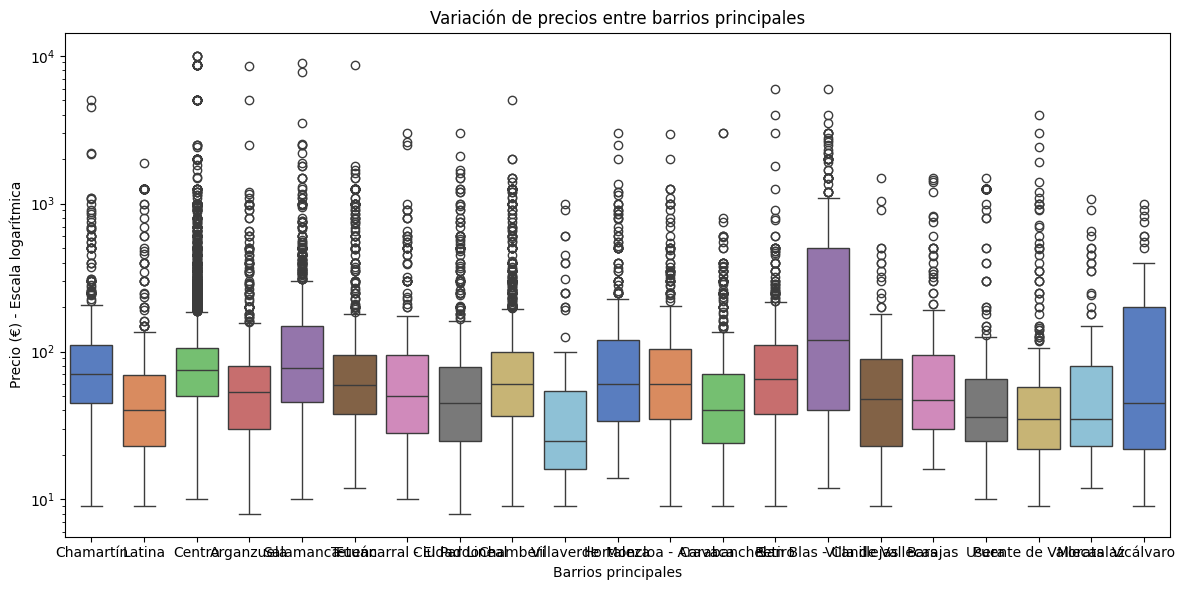

In [20]:
# Variación de precios entre barrios

plt.figure(figsize=(12, 6))
sns.boxplot(data=listings, x='neighbourhood_group', y='price', palette="muted")
plt.yscale('log')  # Escala logarítmica para manejar valores extremos
plt.title('Variación de precios entre barrios principales')
plt.ylabel('Precio (€) - Escala logarítmica')
plt.xlabel('Barrios principales')
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\938914454.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_data, x='Tipo', y='Precio', palette="coolwarm")


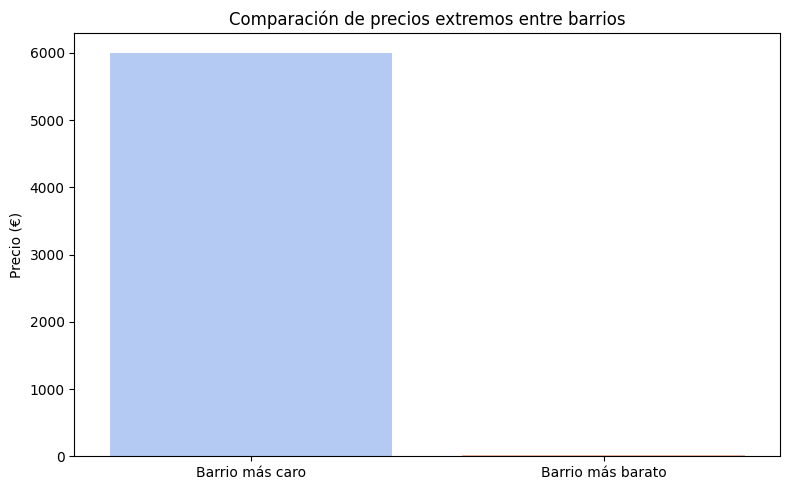

In [21]:
# COMPARACIÓN PRECIOS MÁS ALTOS CON MÁS BAJOS

most_expensive_neighbourhood = listings.groupby('neighbourhood')['price'].mean().idxmax()
most_expensive_price = listings[listings['neighbourhood'] == most_expensive_neighbourhood]['price'].max()

# Precio más barato en el barrio más barato
least_expensive_neighbourhood = listings.groupby('neighbourhood')['price'].mean().idxmin()
least_expensive_price = listings[listings['neighbourhood'] == least_expensive_neighbourhood]['price'].min()

comparison_data = pd.DataFrame({
    'Tipo': ['Barrio más caro', 'Barrio más barato'],
    'Precio': [most_expensive_price, least_expensive_price]
})

# Visualización de la comparación
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Tipo', y='Precio', palette="coolwarm")
plt.title('Comparación de precios extremos entre barrios')
plt.ylabel('Precio (€)')
plt.xlabel('')
plt.tight_layout()
plt.show()

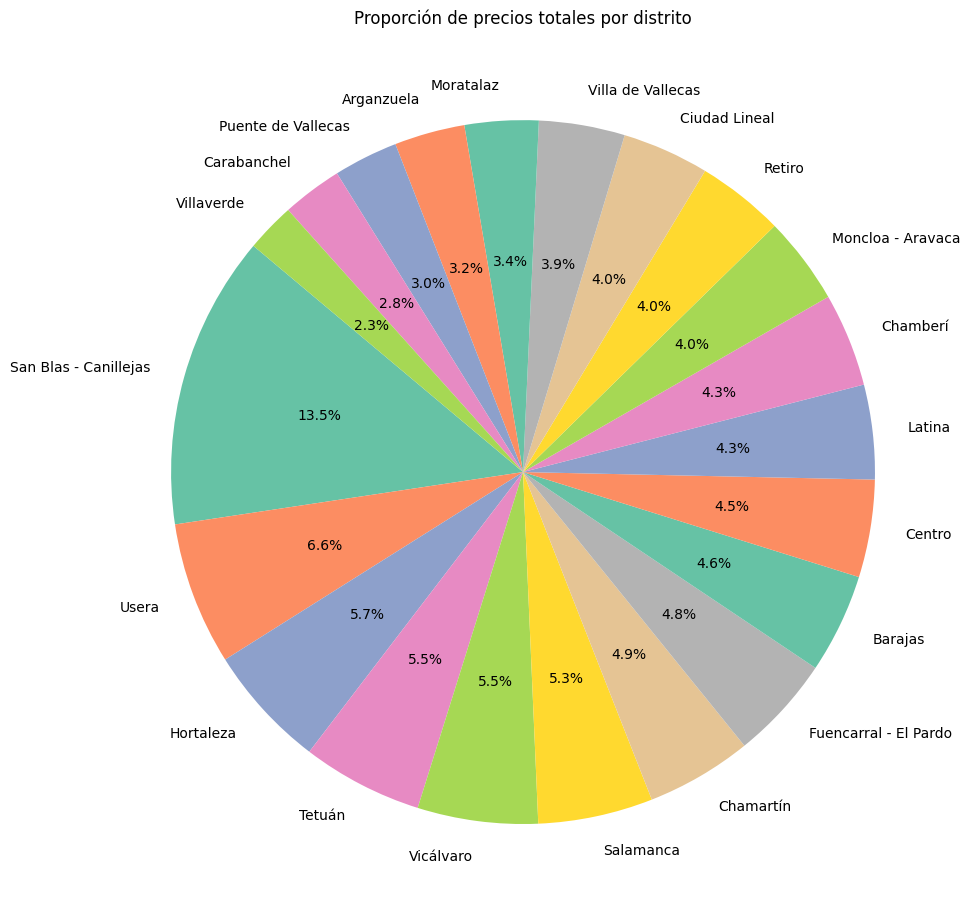

In [24]:
plt.figure(figsize=(10, 10))

# Calcular el porcentaje de precios totales por distrito
price_by_district = listings.groupby('neighbourhood_group')['price'].mean()
price_by_district = price_by_district.sort_values(ascending=False)

# Generar el gráfico de pastel
plt.pie(
    price_by_district,
    labels=price_by_district.index,
    autopct='%1.1f%%',  # Mostrar porcentajes con 1 decimal
    startangle=140,     # Ángulo inicial para organizar los segmentos
    colors=sns.color_palette("Set2", len(price_by_district))  # Paleta de colores
)

plt.title('Proporción de precios totales por distrito')
plt.tight_layout()
plt.show()


C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\3644886362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_low, x='neighbourhood', y='price', palette="Set3")


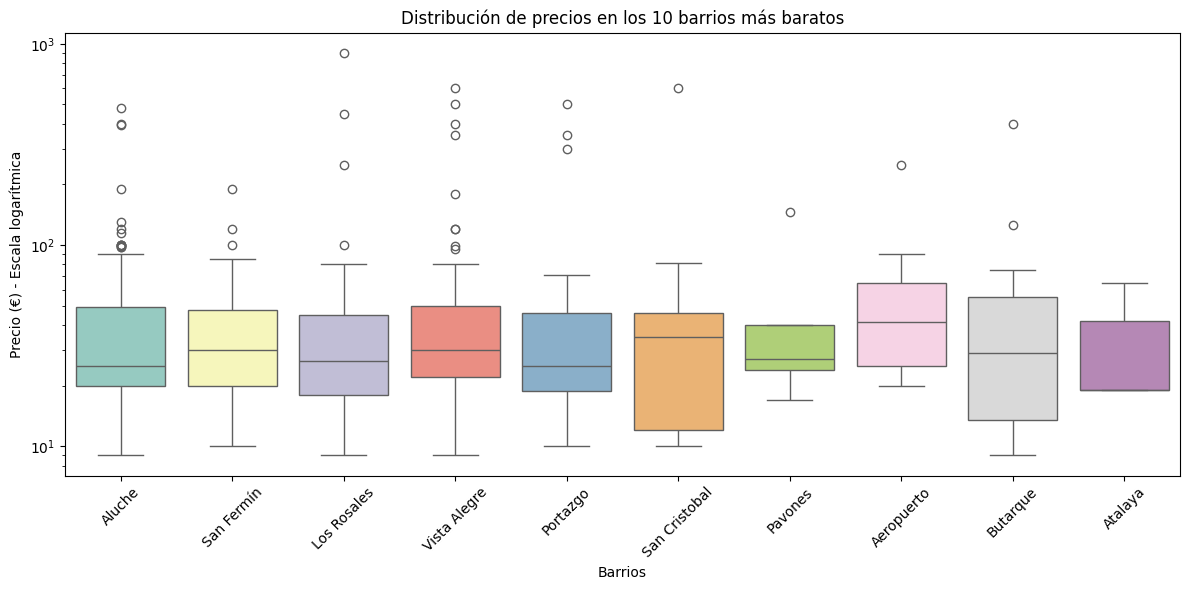

In [23]:
# TOP BARRIOS CON PRECIOS MÁS BAJOS

# Seleccionar los 10 barrios con precios promedio más bajos
bottom_10_neighbourhoods = listings.groupby('neighbourhood')['price'].mean().nsmallest(10).index
filtered_df_low = listings[listings['neighbourhood'].isin(bottom_10_neighbourhoods)]

# Crear un boxplot para los barrios seleccionados
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df_low, x='neighbourhood', y='price', palette="Set3")
plt.yscale('log')  # Escala logarítmica para manejar valores extremos
plt.title('Distribución de precios en los 10 barrios más baratos')
plt.xlabel('Barrios')
plt.ylabel('Precio (€) - Escala logarítmica')
plt.xticks(rotation=45)  # Rotar etiquetas para legibilidad
plt.tight_layout()
plt.show()

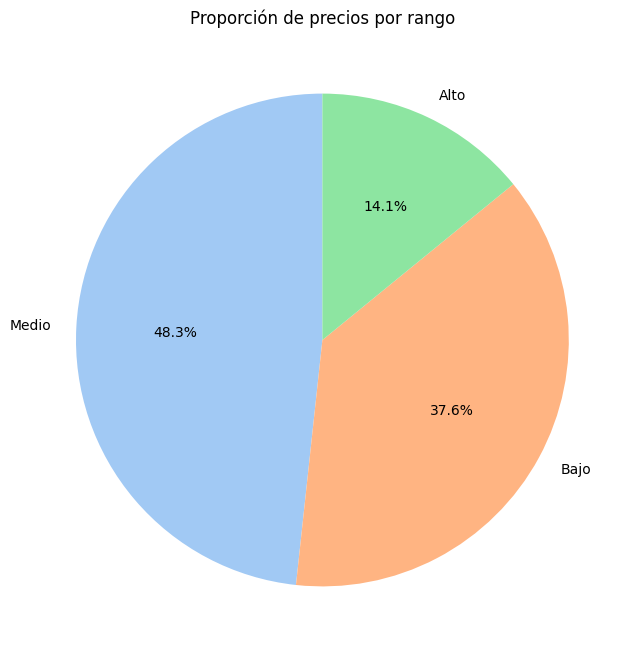

In [25]:
# PIEPLOT - VARIACIÓN DE PRECIOS ENTRE BARRIOS
# Crear rangos de precios promedio por barrio
listings['price_range'] = pd.cut(listings['price'], bins=[0, 50, 150, listings['price'].max()], labels=['Bajo', 'Medio', 'Alto'])

# Calcular proporciones por rango de precios
price_range_counts = listings['price_range'].value_counts()

# Graficar pie chart
plt.figure(figsize=(8, 8))
price_range_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proporción de precios por rango')
plt.ylabel('')  # Quitar etiqueta del eje Y
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\1282243158.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_district = listings.groupby(['neighbourhood_group', 'price_range']).size().unstack().fillna(0)


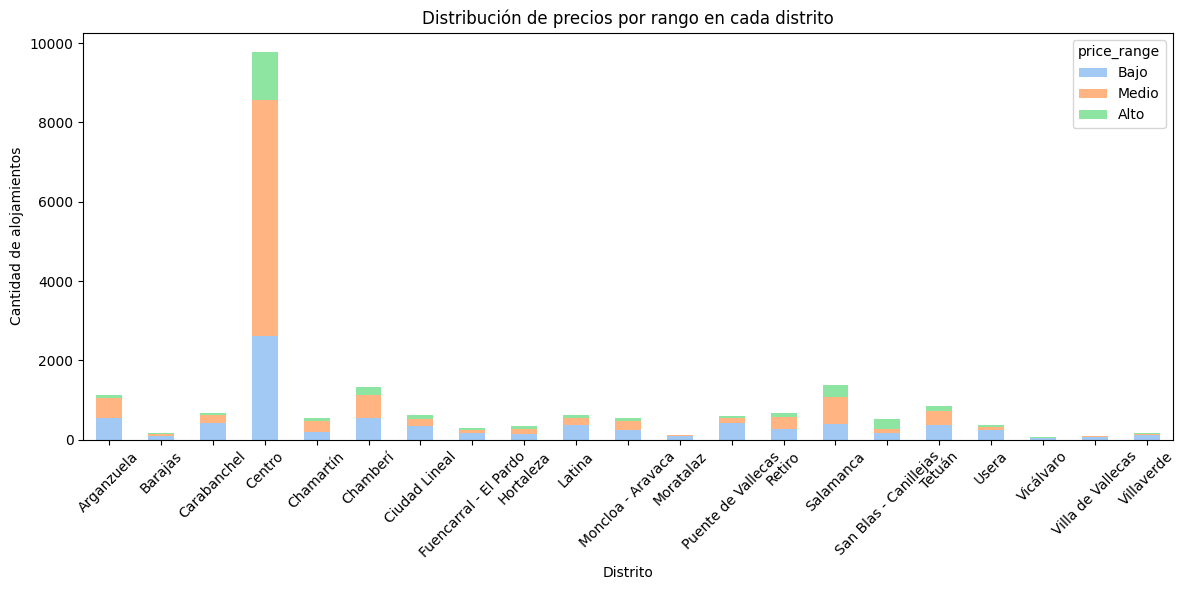

In [28]:
# BARPLOT APLILADO


# Calcular proporciones de precios por rango y distrito
price_by_district = listings.groupby(['neighbourhood_group', 'price_range']).size().unstack().fillna(0)

# Graficar bar chart apilado
price_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('pastel'))
plt.title('Distribución de precios por rango en cada distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de alojamientos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\680779857.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_room_type.index, y=popularity_by_room_type.values, palette="Set2", alpha=0.7, ax=ax1)


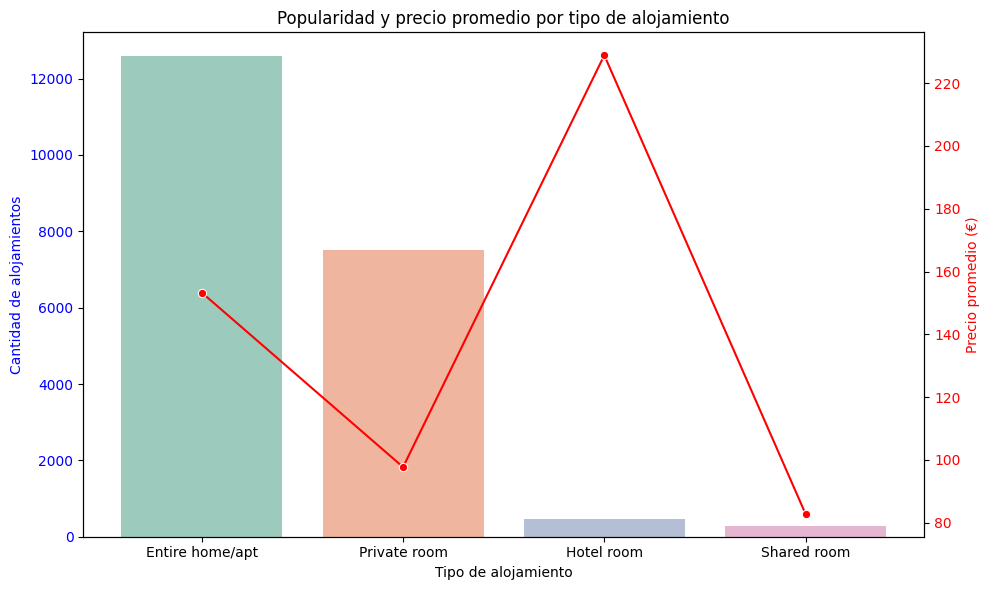

In [31]:
# PREFERENCIA DE TURISTAS

# Precio promedio por tipo de alojamiento
avg_price_by_room_type = listings.groupby('room_type')['price'].mean()

# Popularidad (cantidad) por tipo de alojamiento
popularity_by_room_type = listings['room_type'].value_counts()

# Graficar precio promedio vs popularidad
fig, ax1 = plt.subplots(figsize=(10, 6))

# Popularidad (barras)
sns.barplot(x=popularity_by_room_type.index, y=popularity_by_room_type.values, palette="Set2", alpha=0.7, ax=ax1)
ax1.set_ylabel('Cantidad de alojamientos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Tipo de alojamiento')
ax1.set_title('Popularidad y precio promedio por tipo de alojamiento')

# Precio promedio (línea)
ax2 = ax1.twinx()
sns.lineplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Precio promedio (€)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_1968\976146597.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")


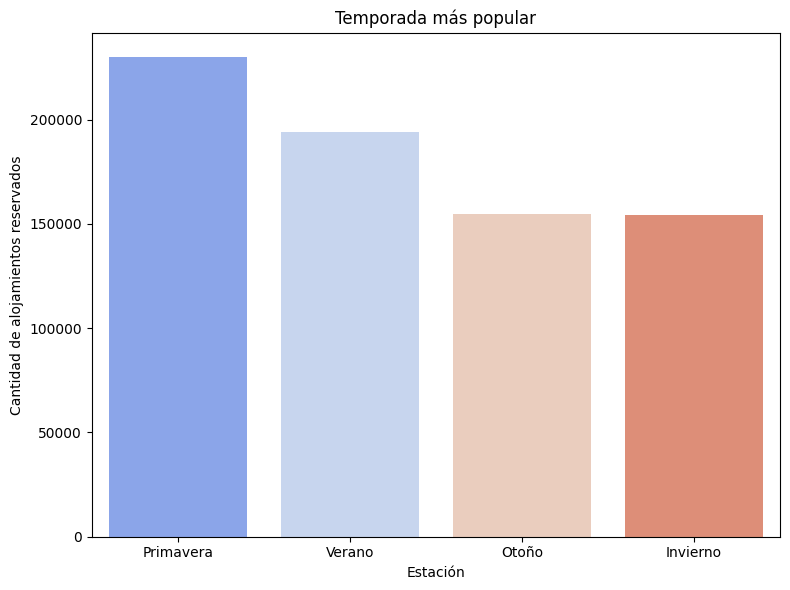

In [38]:
# TEMPORADA MÁS ALTA

# Calcular la cantidad de alojamientos reservados por estación
season_counts = reviews['season'].value_counts()

# Gráfico de barras para estaciones populares
plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.title('Temporada más popular')
plt.xlabel('Estación')
plt.ylabel('Cantidad de alojamientos reservados')
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_7060\3589571532.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_by_reviews.index, y=demand_by_reviews.values, palette="coolwarm")


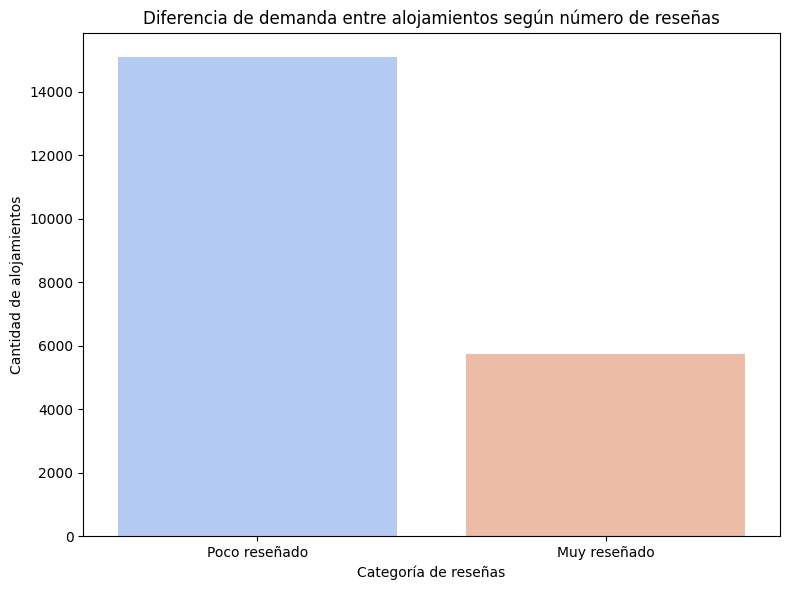

In [21]:
# DEMANDA SEGÚN RESEÑAS

# Dividir los alojamientos en grupos según las reseñas
average_reviews = listings['number_of_reviews'].mean()
listings['review_category'] = listings['number_of_reviews'].apply(
    lambda x: 'Muy reseñado' if x > average_reviews else 'Poco reseñado'
)

# Calcular la demanda (cantidad de reservas) por categoría
demand_by_reviews = listings['review_category'].value_counts()

# Graficar la diferencia de demanda
plt.figure(figsize=(8, 6))
sns.barplot(x=demand_by_reviews.index, y=demand_by_reviews.values, palette="coolwarm")
plt.title('Diferencia de demanda entre alojamientos según número de reseñas')
plt.xlabel('Categoría de reseñas')
plt.ylabel('Cantidad de alojamientos')
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_7060\140005022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demand_by_host_type.index, y=demand_by_host_type.values, palette="Blues")


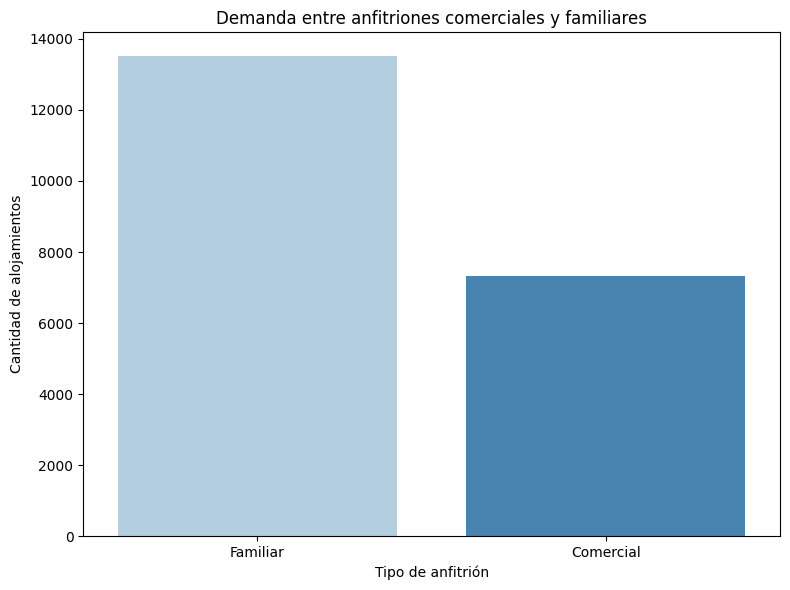

In [18]:
# PREFERENCIA DE ANFITRIONES COMERCIALES VS. FAMILIARES

# Calcular el número de propiedades gestionadas por cada anfitrión
host_property_count = listings.groupby('host_id')['id'].count()

# Clasificar a los anfitriones en comerciales y familiares
listings['host_type'] = listings['host_id'].apply(
    lambda x: 'Comercial' if host_property_count[x] > 3 else 'Familiar'
)

# Calcular la demanda (número de alojamientos) por tipo de anfitrión
demand_by_host_type = listings['host_type'].value_counts()

# Gráfico de barras para demanda
plt.figure(figsize=(8, 6))
sns.barplot(x=demand_by_host_type.index, y=demand_by_host_type.values, palette="Blues")
plt.title('Demanda entre anfitriones comerciales y familiares')
plt.xlabel('Tipo de anfitrión')
plt.ylabel('Cantidad de alojamientos')
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_7060\4049479217.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_host_type.index, y=avg_price_by_host_type.values, palette="Set2")


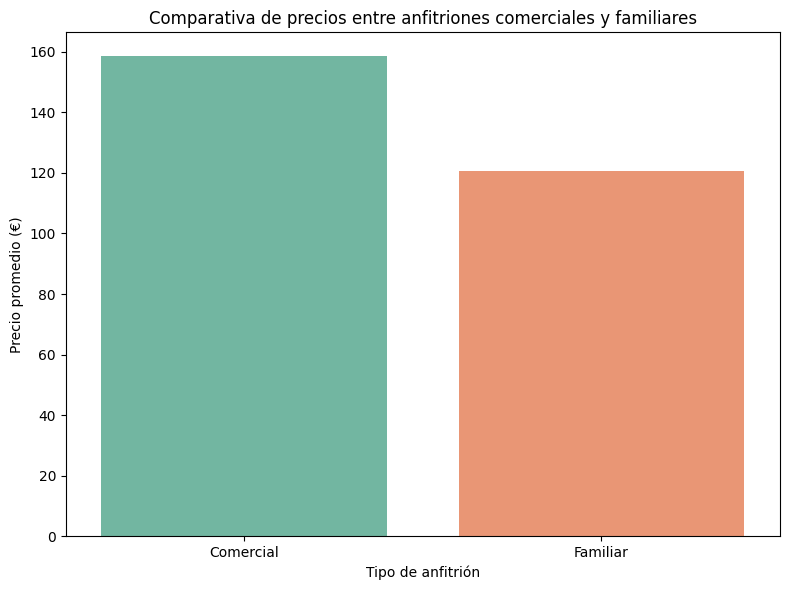

In [19]:
# COMPARATIVA DE PRECIOS SEGÚN TIPO DE ANFITRIÓN

# Precio promedio por tipo de anfitrión
avg_price_by_host_type = listings.groupby('host_type')['price'].mean()

# Gráfico de barras para comparar precios
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_host_type.index, y=avg_price_by_host_type.values, palette="Set2")
plt.title('Comparativa de precios entre anfitriones comerciales y familiares')
plt.xlabel('Tipo de anfitrión')
plt.ylabel('Precio promedio (€)')
plt.tight_layout()
plt.show()

C:\Users\Anita\AppData\Local\Temp\ipykernel_7060\1520758191.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_type_counts.index, y=host_type_counts.values, palette="viridis")


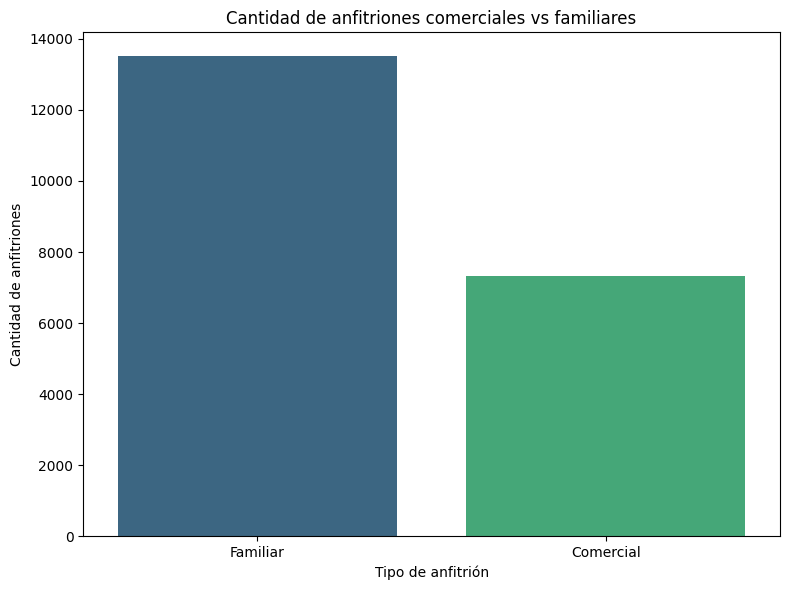

In [20]:
# ANFITRIONES COMERCIONALES VS. FAMILIARES

# Contar la cantidad de anfitriones comerciales y familiares
host_type_counts = listings['host_type'].value_counts()

# Gráfico de barras para la cantidad de anfitriones por tipo
plt.figure(figsize=(8, 6))
sns.barplot(x=host_type_counts.index, y=host_type_counts.values, palette="viridis")
plt.title('Cantidad de anfitriones comerciales vs familiares')
plt.xlabel('Tipo de anfitrión')
plt.ylabel('Cantidad de anfitriones')
plt.tight_layout()
plt.show()